In [1]:
from datetime import datetime
from datetime import timedelta
import pandas as pd
import matplotlib
import numpy as np

In [2]:
max_connection_time=timedelta(hours=2)
max_interval_time=timedelta(hours=3)
min_interval_time=timedelta(seconds=0)
##Read origin data
df=pd.read_pickle('data/2to9data.pkl')

In [3]:
#df

In [4]:
#df.loc[df['user']=='11011110110011000101100010000010']

In [16]:
# #get the list of the User
# userlist=df['user'].drop_duplicates()
# userlist=userlist.iloc[::-1]
# userlist

8302992    00101111100110100100000001010101
6940217    00101111100110100100010010101101
369144     00111010000100000000000100000010
4619059    00111010000100000000000100000110
4605577    00111010000100000000000100011100
                         ...               
8153339    11011110111110011000000000110100
128977     11011110111110011000001101100100
6972493    11011110111110011001000001110111
7140238    11011110111110011001100011000001
4347024    11011110111110011001100100010011
Name: user, Length: 1225506, dtype: object

In [6]:
#show single user data
#df.loc[df_short['user']==userlist.iloc[0]]

In [7]:
##transfer the 'time' data from str to datatime for subsequent processing
df['time']=pd.to_datetime(df['time'])
df['interval']=df['time'].shift(-1)-df['time']#to get the watch interval by subtracting from row to row
df_cut=df.drop(df.groupby(['user']).tail(1).index, axis=0)#throw the last record of each user as the interval is invalid

In [8]:
#df_cut

In [9]:
#WI for Watch_Interval and we eliminate the watch interval==0 second or >2 hours which we think it is in inactive status
WI=df_cut.drop(df_cut[df_cut['interval']<=min_interval_time].index)
WI=WI.drop(WI[WI['interval']>max_interval_time].index)

In [10]:
WI

,time,user,item,interval
4347024,2010-06-29 18:44:26,11011110111110011001100100010011,梁静茹豪华婚礼实录.mp4,0 days 00:16:13
4347646,2010-06-29 19:00:39,11011110111110011001100100010011,传奇故事-100125-女研究生自杀之谜.mp4,0 days 00:00:22
4347666,2010-06-29 19:01:01,11011110111110011001100100010011,传奇故事-100126-一场没有骗子的骗局.mp4,0 days 00:00:02
4347667,2010-06-29 19:01:03,11011110111110011001100100010011,传奇故事-100126-一场没有骗子的骗局.mp4,0 days 00:00:02
4347670,2010-06-29 19:01:05,11011110111110011001100100010011,传奇故事-100125-女研究生自杀之谜.mp4,0 days 00:29:02
...,...,...,...,...
6940217,2010-07-01 11:09:50,00101111100110100100010010101101,新三国(第91集).mp4,0 days 00:53:54
6948851,2010-07-01 12:03:44,00101111100110100100010010101101,新三国(第91集).mp4,0 days 00:53:52
6959522,2010-07-01 12:57:36,00101111100110100100010010101101,新三国(第92集).mp4,0 days 01:31:25
7188472,2010-07-01 14:29:01,00101111100110100100010010101101,新三国(第93集).mp4,0 days 01:40:46


In [12]:
#to get the continue watching data and save it in the list1 for saving running time
#adding time filter when connecting
list1=[]
base=0
i=1
accum=timedelta(seconds=0)
while(i<len(WI)):
    while(i<len(WI) and WI['item'].iloc[i]==WI['item'].iloc[base] and  WI['user'].iloc[i]==WI['user'].iloc[base]):
        accum+=WI['interval'].iloc[i];
        i=i+1;
    if(i==len(WI)):
        break
    if i>base+1 and (WI['time'].iloc[i]-WI['time'].iloc[base])<=max_connection_time:
        list1.append([WI['time'].iloc[base],WI['user'].iloc[base],WI['item'].iloc[base],accum+WI.iloc[base]['interval']])
        #WI.loc[base,'interval']=accum+WI.iloc[base]['interval']         
        accum=timedelta(seconds=0)
    base=i;
    if(base%100000==0):
        print(base)
    i=base+1;

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3700000
3800000
3900000
4100000
4200000
4300000
4400000
4500000
4600000
4700000
4800000
4900000
5000000
5100000
5200000
5300000
5500000
5600000
5700000
5800000
5900000
6000000
6100000
6200000
6400000
6500000
6600000
6700000
6800000
6900000
7000000
7100000
7200000
7300000
7400000
7500000
7600000
7700000
7800000
7900000
8000000
8300000


In [13]:
#from list1 to pandas dataframe continue_watch
continue_watch=pd.DataFrame(list1,columns=['time','user','item','interval'])

In [15]:
#continue_watch['item'].drop_duplicates()

0         传奇故事-100126-一场没有骗子的骗局.mp4
1          传奇故事-100125-女研究生自杀之谜.mp4
2                     敢死队(第01集).mp4
3                     敢死队(第09集).mp4
4                     敢死队(第02集).mp4
                    ...            
414589          金田一少年事件簿(第133集).mp4
414595    100120男子看3D《阿凡达》中风后死亡.mp4
414605               少年康熙(第28集).mp4
414618          天下收藏-100319-唐三彩.mp4
414630               哪吒传奇(第50集).mp4
Name: item, Length: 62230, dtype: object

In [17]:
# #to get the continue watching data and save it in the list1 for saving running time
# #adding time filter when connecting
# list2=[]
# base=0
# i=1
# accum=timedelta(seconds=0)
# while(i<len(WI)):
#     while(i<len(WI) and WI['item'].iloc[i]==WI['item'].iloc[base] and  WI['user'].iloc[i]==WI['user'].iloc[base]):
#         accum+=WI['interval'].iloc[i];
#         i=i+1;
#     if(i==len(WI)):
#         break
#     if i>base+1 and (WI['time'].iloc[i]-WI['time'].iloc[base])>max_connection_time:
#         list2.append([WI['time'].iloc[base],WI['user'].iloc[base],WI['item'].iloc[base],accum+WI.iloc[base]['interval']])
#         #WI.loc[base,'interval']=accum+WI.iloc[base]['interval']         
#         accum=timedelta(seconds=0)
#     base=i;
#     if(base%100000==0):
#         print(base)
#     i=base+1;

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3700000
3800000
3900000
4100000
4200000
4300000
4400000
4500000
4600000
4700000
4800000
4900000
5000000
5100000
5200000
5300000
5500000
5600000
5700000
5800000
5900000
6000000
6100000
6200000
6400000
6500000
6600000
6700000
6800000
6900000
7000000
7100000
7200000
7300000
7400000
7500000
7600000
7700000
7800000
7900000
8000000
8300000


In [18]:
#from list1 to pandas dataframe continue_watch
# continue_watch2=pd.DataFrame(list2,columns=['time','user','item','interval'])

In [19]:
# continue_watch2['item'].drop_duplicates()

0         国光帮帮忙-100610-就算衰到爆也要穷开心.mp4
1           天天向上-100625-姜续昌玉米提吴俊余.mp4
2                          所罗门·凯恩.mp4
3                      泡沫之夏(第04集).mp4
4                吸血鬼日记[第1季](第01集).mp4
                     ...             
125036            笑傲江湖[李亚鹏](第38集).mp4
125039               陈翔—快乐男声全国20强.mp4
125048              绯闻少女第3季(第14集).mp4
125063                  死神(第153集).mp4
125074         档案-091118-军统江山帮的覆灭.mp4
Name: item, Length: 33227, dtype: object

In [25]:
# This part of code is put the continue watch dataframe back into the previous interval dataframe to get the true watch data
#to drop the duplicated data with same item same user 
new_WI=WI.drop(WI[(WI['item']==WI['item'].shift(1)) & (WI['user']==WI['user'].shift(1))&(WI['time'].-WI['time']shift(1)<max_connection_time)].index)
#concat the continue watch data and new_WI
merge=pd.concat([new_WI,continue_watch],axis=0,join='outer')
#drop the duplicated data with same item same user again to reput the
result=merge.drop_duplicates(subset=['time', 'user','item'], keep='last')
#resort to recover the previous order as the origin data
sorted_result=result.sort_values(by=['user','time'],ascending=[False,True])

In [28]:
new_WI

,time,user,item,interval
4347024,2010-06-29 18:44:26,11011110111110011001100100010011,梁静茹豪华婚礼实录.mp4,0 days 00:16:13
4347646,2010-06-29 19:00:39,11011110111110011001100100010011,传奇故事-100125-女研究生自杀之谜.mp4,0 days 00:00:22
4347666,2010-06-29 19:01:01,11011110111110011001100100010011,传奇故事-100126-一场没有骗子的骗局.mp4,0 days 00:00:02
4347670,2010-06-29 19:01:05,11011110111110011001100100010011,传奇故事-100125-女研究生自杀之谜.mp4,0 days 00:29:02
4696297,2010-06-29 19:52:10,11011110111110011001100100010011,传奇故事-100122-那天晚上到底发生了什么.mp4,0 days 00:00:26
...,...,...,...,...
9857524,2010-07-03 23:59:33,00111010000100000000000100000010,王牌大贱谍-091110-我再穷都要有一部车.mp4,0 days 00:00:15
6940217,2010-07-01 11:09:50,00101111100110100100010010101101,新三国(第91集).mp4,0 days 00:53:54
6959522,2010-07-01 12:57:36,00101111100110100100010010101101,新三国(第92集).mp4,0 days 01:31:25
7188472,2010-07-01 14:29:01,00101111100110100100010010101101,新三国(第93集).mp4,0 days 01:40:46


In [27]:
WI

,time,user,item,interval
4347024,2010-06-29 18:44:26,11011110111110011001100100010011,梁静茹豪华婚礼实录.mp4,0 days 00:16:13
4347646,2010-06-29 19:00:39,11011110111110011001100100010011,传奇故事-100125-女研究生自杀之谜.mp4,0 days 00:00:22
4347666,2010-06-29 19:01:01,11011110111110011001100100010011,传奇故事-100126-一场没有骗子的骗局.mp4,0 days 00:00:02
4347667,2010-06-29 19:01:03,11011110111110011001100100010011,传奇故事-100126-一场没有骗子的骗局.mp4,0 days 00:00:02
4347670,2010-06-29 19:01:05,11011110111110011001100100010011,传奇故事-100125-女研究生自杀之谜.mp4,0 days 00:29:02
...,...,...,...,...
6940217,2010-07-01 11:09:50,00101111100110100100010010101101,新三国(第91集).mp4,0 days 00:53:54
6948851,2010-07-01 12:03:44,00101111100110100100010010101101,新三国(第91集).mp4,0 days 00:53:52
6959522,2010-07-01 12:57:36,00101111100110100100010010101101,新三国(第92集).mp4,0 days 01:31:25
7188472,2010-07-01 14:29:01,00101111100110100100010010101101,新三国(第93集).mp4,0 days 01:40:46


In [26]:
sorted_result

,time,user,item,interval
4347024,2010-06-29 18:44:26,11011110111110011001100100010011,梁静茹豪华婚礼实录.mp4,0 days 00:16:13
4347646,2010-06-29 19:00:39,11011110111110011001100100010011,传奇故事-100125-女研究生自杀之谜.mp4,0 days 00:00:22
0,2010-06-29 19:01:01,11011110111110011001100100010011,传奇故事-100126-一场没有骗子的骗局.mp4,0 days 00:00:04
1,2010-06-29 19:01:05,11011110111110011001100100010011,传奇故事-100125-女研究生自杀之谜.mp4,0 days 00:51:05
4696297,2010-06-29 19:52:10,11011110111110011001100100010011,传奇故事-100122-那天晚上到底发生了什么.mp4,0 days 00:00:26
...,...,...,...,...
9857524,2010-07-03 23:59:33,00111010000100000000000100000010,王牌大贱谍-091110-我再穷都要有一部车.mp4,0 days 00:00:15
414656,2010-07-01 11:09:50,00101111100110100100010010101101,新三国(第91集).mp4,0 days 01:47:46
6959522,2010-07-01 12:57:36,00101111100110100100010010101101,新三国(第92集).mp4,0 days 01:31:25
7188472,2010-07-01 14:29:01,00101111100110100100010010101101,新三国(第93集).mp4,0 days 01:40:46


In [82]:
# to get the max watch time for each item from all users, and we consider it as the max length of the item
max_watchtime=sorted_result.groupby(['item'])[['item','interval']].max().rename(columns={'interval':'max_interval'})

In [83]:
#max_watchtime

,item,max_interval
item,,
,,0 days 02:55:46
(21)寻找战士奶爸-08年5月16日 绵竹市汉旺金鱼嘴.mp4,(21)寻找战士奶爸-08年5月16日 绵竹市汉旺金鱼嘴.mp4,0 days 00:16:26
(23)寻找从容的李科-08年5月16日 成都凤凰山机场.mp4,(23)寻找从容的李科-08年5月16日 成都凤凰山机场.mp4,0 days 00:00:23
00100512中道齐家三部曲之二家庭教育(1).mp4,00100512中道齐家三部曲之二家庭教育(1).mp4,0 days 00:29:12
00100512中道齐家三部曲之二家庭教育(10).mp4,00100512中道齐家三部曲之二家庭教育(10).mp4,0 days 00:51:49
...,...,...
龙鸣(第20集).mp4,龙鸣(第20集).mp4,0 days 01:50:42
龙鸣(第21集).mp4,龙鸣(第21集).mp4,0 days 00:22:48
龙鸣(第22集).mp4,龙鸣(第22集).mp4,0 days 01:39:42


In [86]:
#caculate the watch ratio 
summary=sorted_result.join(max_watchtime.set_index('item'), on='item')
summary['watch_ratio']=summary['interval']/summary['max_interval']

In [93]:
#summary

,time,user,item,interval,max_interval,watch_ratio
4347024,2010-06-29 18:44:26,11011110111110011001100100010011,梁静茹豪华婚礼实录.mp4,0 days 00:16:13,0 days 02:22:34,0.113748
4347646,2010-06-29 19:00:39,11011110111110011001100100010011,传奇故事-100125-女研究生自杀之谜.mp4,0 days 00:00:22,0 days 00:54:19,0.006751
0,2010-06-29 19:01:01,11011110111110011001100100010011,传奇故事-100126-一场没有骗子的骗局.mp4,0 days 00:00:04,0 days 00:13:01,0.005122
1,2010-06-29 19:01:05,11011110111110011001100100010011,传奇故事-100125-女研究生自杀之谜.mp4,0 days 00:51:05,0 days 00:54:19,0.940473
4696297,2010-06-29 19:52:10,11011110111110011001100100010011,传奇故事-100122-那天晚上到底发生了什么.mp4,0 days 00:00:26,0 days 00:41:46,0.010375
...,...,...,...,...,...,...
9857524,2010-07-03 23:59:33,00111010000100000000000100000010,王牌大贱谍-091110-我再穷都要有一部车.mp4,0 days 00:00:15,0 days 00:02:33,0.098039
516060,2010-07-01 11:09:50,00101111100110100100010010101101,新三国(第91集).mp4,0 days 01:47:46,0 days 03:15:10,0.552178
6959522,2010-07-01 12:57:36,00101111100110100100010010101101,新三国(第92集).mp4,0 days 01:31:25,0 days 04:09:45,0.366033
7188472,2010-07-01 14:29:01,00101111100110100100010010101101,新三国(第93集).mp4,0 days 01:40:46,0 days 03:26:18,0.488447


In [94]:
test=summary.copy()

In [96]:
test.drop(test[test['watch_ratio']==1].index)

,time,user,item,interval,max_interval,watch_ratio
4347024,2010-06-29 18:44:26,11011110111110011001100100010011,梁静茹豪华婚礼实录.mp4,0 days 00:16:13,0 days 02:22:34,0.113748
4347646,2010-06-29 19:00:39,11011110111110011001100100010011,传奇故事-100125-女研究生自杀之谜.mp4,0 days 00:00:22,0 days 00:54:19,0.006751
0,2010-06-29 19:01:01,11011110111110011001100100010011,传奇故事-100126-一场没有骗子的骗局.mp4,0 days 00:00:04,0 days 00:13:01,0.005122
1,2010-06-29 19:01:05,11011110111110011001100100010011,传奇故事-100125-女研究生自杀之谜.mp4,0 days 00:51:05,0 days 00:54:19,0.940473
4696297,2010-06-29 19:52:10,11011110111110011001100100010011,传奇故事-100122-那天晚上到底发生了什么.mp4,0 days 00:00:26,0 days 00:41:46,0.010375
...,...,...,...,...,...,...
9857524,2010-07-03 23:59:33,00111010000100000000000100000010,王牌大贱谍-091110-我再穷都要有一部车.mp4,0 days 00:00:15,0 days 00:02:33,0.098039
516060,2010-07-01 11:09:50,00101111100110100100010010101101,新三国(第91集).mp4,0 days 01:47:46,0 days 03:15:10,0.552178
6959522,2010-07-01 12:57:36,00101111100110100100010010101101,新三国(第92集).mp4,0 days 01:31:25,0 days 04:09:45,0.366033
7188472,2010-07-01 14:29:01,00101111100110100100010010101101,新三国(第93集).mp4,0 days 01:40:46,0 days 03:26:18,0.488447


In [ ]:
test2=test.drop(test[test['watch ratio']==1].index)
test2['watch ratio'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

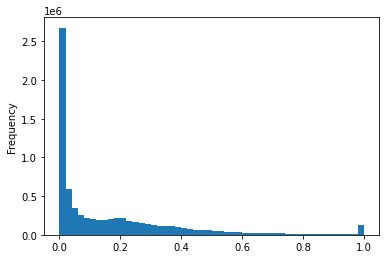

In [98]:
test['watch_ratio'].plot.hist(bins=50)

In [99]:
len(test)

7462141

In [100]:
summary.to_pickle('10M_watch_ratio_with_connection_time_filter.pkl')